In [21]:
import pandas as pd
import matplotlib as mp
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_classif
%matplotlib inline


In [22]:
DemoCar_df=pd.read_csv('C:/Users/Himanshi/Downloads/cardf_new.csv')

In [23]:
DemoCar_df.head()

,Selling_price,Present_new,Kms_driven,total_years,Fuel_type_Diesel,Fuel_type_LPG,Fuel_type_Petrol,Transmission_Manual
0,120000,126000,50000,17,1,0,0,1
1,50000,52500,120000,20,1,0,0,1
2,430000,451500,50000,10,0,0,1,1
3,1200000,1260000,60000,10,0,0,1,0
4,1295000,1359750,58000,11,1,0,0,0


In [24]:
X=DemoCar_df.iloc[:,1:]
Y=DemoCar_df.iloc[:,0]

In [25]:
from sklearn.linear_model import LinearRegression

# Fitting the model
lm_model = LinearRegression()
lm_model.fit(X, Y)

# Returning the R^2 for the model
lm_r2 = lm_model.score(X, Y)
print('R square is: {0}'.format(lm_r2))

R square is: 0.9933885820434636


In [26]:
#1 LINEARITY
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable.    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


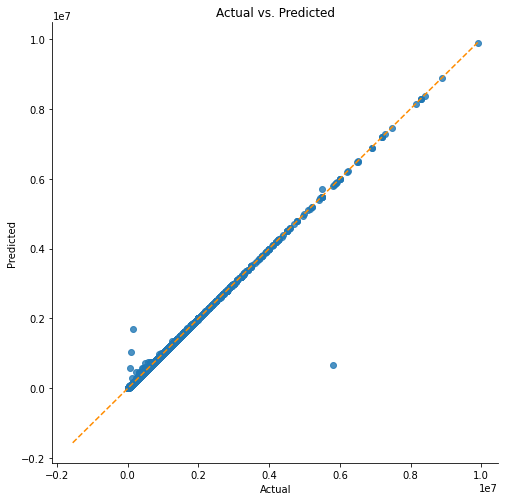

In [27]:
linear_assumption(lm_model, X, Y)

In [20]:
#2 NORMALITY OF ERROR
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.displot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


C:\Users\Himanshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


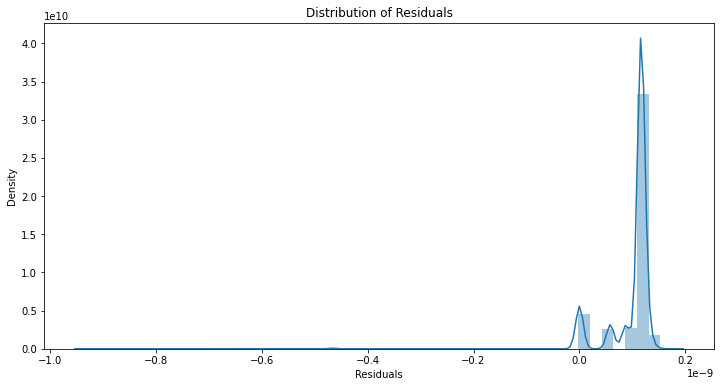


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [18]:
normal_errors_assumption(lm_model, X, Y)

In [16]:
#3 NO MULTICLLINEARITY
DemoCar_df.corr()

,Selling_price,Present_new,Kms_driven,total_years,Fuel_type_Diesel,Fuel_type_LPG,Fuel_type_Petrol,Transmission_Manual
Selling_price,1.000000,1.000000,-0.177214,-0.419921,0.234348,-0.041354,-0.221450,-0.519887
Present_new,1.000000,1.000000,-0.177214,-0.419921,0.234348,-0.041354,-0.221450,-0.519887
Kms_driven,-0.177214,-0.177214,1.000000,0.401638,0.288150,0.026045,-0.289553,0.122790
total_years,-0.419921,-0.419921,0.401638,1.000000,-0.062163,0.064150,0.058721,0.168223
Fuel_type_Diesel,0.234348,0.234348,0.288150,-0.062163,1.000000,-0.073471,-0.969694,-0.011819
Fuel_type_LPG,-0.041354,-0.041354,0.026045,0.064150,-0.073471,1.000000,-0.068332,0.025047
Fuel_type_Petrol,-0.221450,-0.221450,-0.289553,0.058721,-0.969694,-0.068332,1.000000,0.001674
Transmission_Manual,-0.519887,-0.519887,0.122790,0.168223,-0.011819,0.025047,0.001674,1.000000


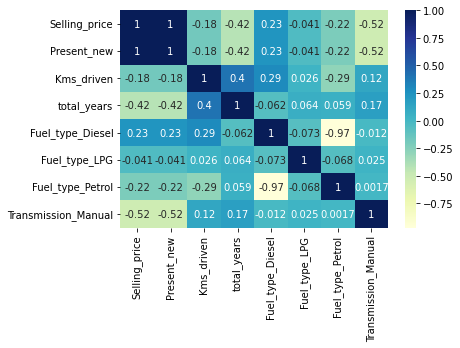

In [19]:
dataplot = sns.heatmap(DemoCar_df.corr(), cmap="YlGnBu", annot=True)

In [2]:
#4 NO AUTOCORRELATION OF ERROR TERMS
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [13]:
autocorrelation_assumption(lm_model, X, Y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 0.22443253240146582
Signs of positive autocorrelation 

Assumption not satisfied


In [14]:
#5 Homoscedasticity
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


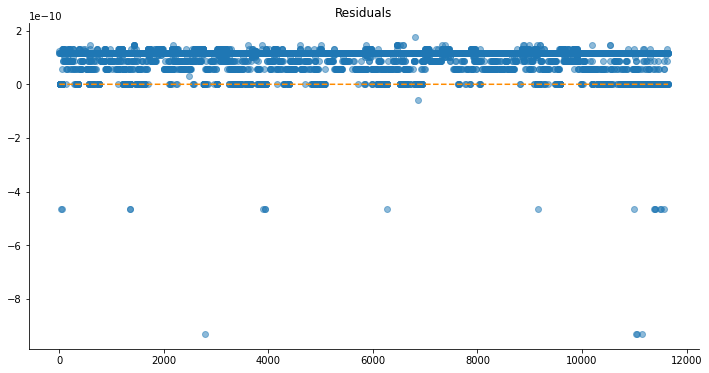

In [15]:
homoscedasticity_assumption(lm_model, X, Y)